estimator 高阶API , 一套极大的简化了机器学习编程的高阶API.

# estimator

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('./train.csv')
eval_df = pd.read_csv('./eval.csv')
print(train_df.info())
print(eval_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            264 non-nul

In [3]:
display(train_df,eval_df)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y
...,...,...,...,...,...,...,...,...,...,...
259,1,female,25.0,0,1,26.0000,Second,unknown,Southampton,n
260,0,male,33.0,0,0,7.8958,Third,unknown,Southampton,y
261,0,female,39.0,0,5,29.1250,Third,unknown,Queenstown,n
262,0,male,27.0,0,0,13.0000,Second,unknown,Southampton,y


In [4]:
y_train = train_df.pop('survived')
y_eval = eval_df.pop('survived')

display(train_df.head())
display(eval_df.head())
display(y_train.head())
display(y_eval.head())

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

0    0
1    0
2    1
3    1
4    1
Name: survived, dtype: int64

In [5]:
train_df.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


<AxesSubplot:>

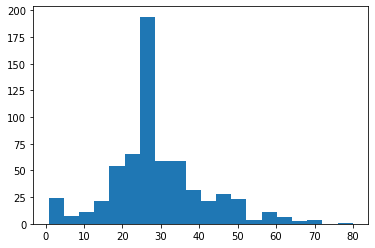

In [7]:
# 观察年龄的数据分布
train_df.age.hist(bins=20,grid=False)

<AxesSubplot:>

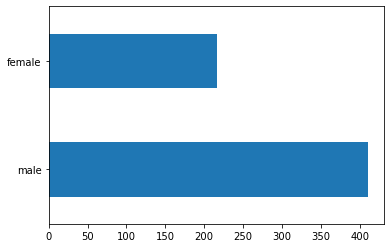

In [8]:
# 观察性别数量对比
train_df.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

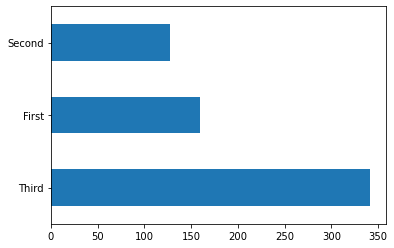

In [9]:
# 仓位对比
train_df['class'].value_counts().plot(kind='barh')

<AxesSubplot:>

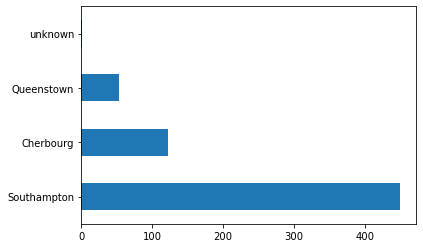

In [11]:
# 港口人数
train_df['embark_town'].value_counts().plot(kind='barh')

<AxesSubplot:ylabel='sex'>

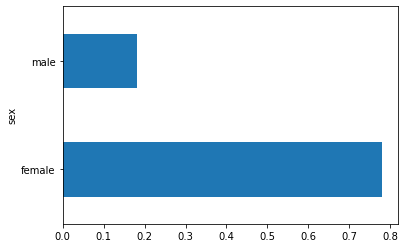

In [12]:
# 男女生还的概率
pd.concat([train_df, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh')

In [13]:
train_df.embark_town.value_counts()

Southampton    450
Cherbourg      123
Queenstown      53
unknown          1
Name: embark_town, dtype: int64

In [14]:
train_df['sex'].unique()

array(['male', 'female'], dtype=object)

In [15]:
train_df.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [16]:
# 区分离散特征和连续特征
categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
numeric_columns = ['age', 'fare']

feature_columns = []
for categorical_column in categorical_columns:
    vocab = train_df[categorical_column].unique()
#     print(categorical_column, vocab)
    feature_columns.append(
        tf.feature_column.indicator_column(              tf.feature_column.categorical_column_with_vocabulary_list(categorical_column, vocab)))   

In [17]:
for numeric_column in numeric_columns:
    feature_columns.append(
        tf.feature_column.numeric_column(
            numeric_column, dtype=tf.float32))

In [18]:
feature_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town',

In [19]:
dict(train_df)

{'sex': 0        male
 1      female
 2      female
 3      female
 4        male
         ...  
 622      male
 623      male
 624    female
 625    female
 626      male
 Name: sex, Length: 627, dtype: object,
 'age': 0      22.0
 1      38.0
 2      26.0
 3      35.0
 4      28.0
        ... 
 622    28.0
 623    25.0
 624    19.0
 625    28.0
 626    32.0
 Name: age, Length: 627, dtype: float64,
 'n_siblings_spouses': 0      1
 1      1
 2      0
 3      1
 4      0
       ..
 622    0
 623    0
 624    0
 625    1
 626    0
 Name: n_siblings_spouses, Length: 627, dtype: int64,
 'parch': 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 622    0
 623    0
 624    0
 625    2
 626    0
 Name: parch, Length: 627, dtype: int64,
 'fare': 0       7.2500
 1      71.2833
 2       7.9250
 3      53.1000
 4       8.4583
         ...   
 622    10.5000
 623     7.0500
 624    30.0000
 625    23.4500
 626     7.7500
 Name: fare, Length: 627, dtype: float64,
 'class': 0       Third
 

In [20]:
# 创建生成dataset的方法
def make_dataset(data_df, label_df, epochs=10, shuffle=True, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
        dataset = dataset.shuffle(10000)
    dataset = dataset.repeat(epochs).batch(batch_size)
    return dataset

In [21]:
train_dataset = make_dataset(train_df, y_train, batch_size=5)

In [22]:
for x, y in train_dataset.take(1):
    print(x, y)

{'sex': <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'female', b'male', b'male', b'male', b'male'], dtype=object)>, 'age': <tf.Tensor: shape=(5,), dtype=float64, numpy=array([40., 47., 36., 32., 21.])>, 'n_siblings_spouses': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0], dtype=int64)>, 'parch': <tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 0, 0], dtype=int64)>, 'fare': <tf.Tensor: shape=(5,), dtype=float64, numpy=array([153.4625,   7.25  ,  10.5   ,   7.925 ,   7.775 ])>, 'class': <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'First', b'Third', b'Second', b'Third', b'Third'], dtype=object)>, 'deck': <tf.Tensor: shape=(5,), dtype=string, numpy=array([b'C', b'unknown', b'unknown', b'unknown', b'unknown'], dtype=object)>, 'embark_town': <tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'Southampton', b'Southampton', b'Southampton', b'Southampton',
       b'Southampton'], dtype=object)>, 'alone': <tf.Tensor: shape=(5,), dtype=string, numpy=ar

In [23]:
len(feature_columns)

9

In [25]:
# keras.layers.DenseFeatures()
for x, y in train_dataset.take(1):
    age_column = feature_columns[7]
    sex_column = feature_columns[0]
    print(keras.layers.DenseFeatures(age_column)(x))
    print(keras.layers.DenseFeatures(sex_column)(x))

tf.Tensor(
[[32.]
 [28.]
 [28.]
 [26.]
 [28.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


In [24]:
train_dataset

<BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'n_siblings_spouses': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'deck': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'embark_town': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [26]:
for x, y in train_dataset.take(1):
    print(keras.layers.DenseFeatures(feature_columns)(x).numpy())

[[31.      1.      0.      0.      0.      1.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
  26.25    1.      0.      0.      0.      0.      0.      0.      0.
   1.      0.      0.      0.      0.      0.      1.    ]
 [55.5     0.      1.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
   8.05    0.      1.      0.      0.      0.      0.      0.      1.
   0.      0.      0.      0.      0.      1.      0.    ]
 [61.      0.      1.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
   6.2375  0.      1.      0.      0.      0.      0.      0.      1.
   0.      0.      0.      0.      0.      1.      0.    ]
 [20.      0.      1.      1.      0.      0.      1.      0.      0.
   0.      0.      0.      0.      0.      1.      0.      0.      0.
   7.05    0.      1.      0.      0.      0.      0.

In [27]:
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [28]:
train_dataset = make_dataset(train_df, y_train, epochs=100)
eval_dataset = make_dataset(eval_df, y_eval, epochs=1, shuffle=False)

In [29]:
history = model.fit(train_dataset,
         validation_data=eval_dataset,
         steps_per_epoch=20,
         validation_steps=8,
         epochs=100)

Epoch 1/100
20/20 [==============================] - 2s 36ms/step - loss: 0.6704 - acc: 0.6750 - val_loss: 0.5920 - val_acc: 0.6836
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5704 - acc: 0.7078 - val_loss: 0.5541 - val_acc: 0.7031
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5596 - acc: 0.7094 - val_loss: 0.6182 - val_acc: 0.7344
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6635 - acc: 0.6906 - val_loss: 0.6529 - val_acc: 0.6758
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6055 - acc: 0.7172 - val_loss: 0.5221 - val_acc: 0.7305
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4919 - acc: 0.7734 - val_loss: 0.5031 - val_acc: 0.7383
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4609 - acc: 0.7969 - val_loss: 0.5046 - val_acc: 0.7461
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4757 - 

20/20 [==============================] - 0s 4ms/step - loss: 0.4604 - acc: 0.7891 - val_loss: 0.5241 - val_acc: 0.7695
Epoch 45/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3986 - acc: 0.8313 - val_loss: 0.5052 - val_acc: 0.7773
Epoch 46/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4104 - acc: 0.8266 - val_loss: 0.4517 - val_acc: 0.8125
Epoch 47/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4355 - acc: 0.8172 - val_loss: 0.6432 - val_acc: 0.7383
Epoch 48/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4740 - acc: 0.7953 - val_loss: 0.4849 - val_acc: 0.7852
Epoch 49/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4185 - acc: 0.8234 - val_loss: 0.5523 - val_acc: 0.7539
Epoch 50/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4071 - acc: 0.8281 - val_loss: 0.5000 - val_acc: 0.7734
Epoch 51/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3949 - acc: 0

In [35]:
model.evaluate(eval_dataset)

9/9 [==============================] - 0s 2ms/step - loss: 0.5264 - acc: 0.7955


[0.5263838768005371, 0.7954545617103577]

# premade-estimator

In [36]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## baseline_model

In [37]:
import os
output_dir = 'baseline_model'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
baseline_estimator = tf.compat.v1.estimator.BaselineClassifier(
    model_dir=output_dir,
    n_classes=2)
# input_fn要求没有输入参数, 要求返回元组(x,y)或者可以返回(x,y)的dataset
baseline_estimator.train(input_fn=lambda : make_dataset(
    train_df, y_train, epochs=100))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'baseline_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialize

In [38]:
# baseline是随机的参数.所以结果很差.
baseline_estimator.evaluate(input_fn=lambda : make_dataset(
    eval_df, y_eval, epochs=1, shuffle=False, batch_size=20))

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-05-30T21:35:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from baseline_model\model.ckpt-1960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.98264s
INFO:tensorflow:Finished evaluation at 2022-05-30-21:35:46
INFO:tensorflow:Saving dict for global step 1960: accuracy = 0.625, accuracy_baseline = 0.625, auc = 0.5, auc_precision_recall = 0.6875, average_loss = 0.6619387, global_step = 1960, label/mean = 0.375, loss = 12.482274, precision = 0.0, prediction/mean = 0.38832638, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1960: baseline_model\model.ckpt-1960


{'accuracy': 0.625,
 'accuracy_baseline': 0.625,
 'auc': 0.5,
 'auc_precision_recall': 0.6875,
 'average_loss': 0.6619387,
 'label/mean': 0.375,
 'loss': 12.482274,
 'precision': 0.0,
 'prediction/mean': 0.38832638,
 'recall': 0.0,
 'global_step': 1960}

In [39]:
y_train.value_counts()

0    384
1    243
Name: survived, dtype: int64

In [40]:
384/(384+243)

0.6124401913875598

##  linear_model

In [41]:
linear_output_dir = 'linear_model'
if not os.path.exists(linear_output_dir):
    os.mkdir(linear_output_dir)
    
linear_estimator = tf.estimator.LinearClassifier(
    feature_columns=feature_columns,
    model_dir=linear_output_dir)

linear_estimator.train(input_fn=lambda :make_dataset(train_df, y_train, epochs=100))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'linear_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instanc

In [42]:
linear_estimator.evaluate(input_fn=lambda : make_dataset(
    eval_df, y_eval, epochs=1, shuffle=False, batch_size=20))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-05-30T21:38:44
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from linear_model\model.ckpt-1960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.30640s
INFO:tensorflow:Finished evaluation at 2022-05-30-21:38:46
INFO:tensorflow:Saving dict for global step 1960: accuracy = 0.77272725, accuracy_baseline = 0.625, auc = 0.8307316, auc_precision_recall = 0.77384615, average_loss = 0.49423167, global_step = 1960, label/mean = 0.375, loss = 0.49043733, precision = 0.73493975, prediction/mean = 0.30915117, recall = 0.61616164
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1960: linear_model\model.ckpt-1960


{'accuracy': 0.77272725,
 'accuracy_baseline': 0.625,
 'auc': 0.8307316,
 'auc_precision_recall': 0.77384615,
 'average_loss': 0.49423167,
 'label/mean': 0.375,
 'loss': 0.49043733,
 'precision': 0.73493975,
 'prediction/mean': 0.30915117,
 'recall': 0.61616164,
 'global_step': 1960}

## DNN_model

In [44]:
dnn_output_dir = './dnn_model'
if not os.path.exists(dnn_output_dir):
    os.mkdir(dnn_output_dir)
    
dnn_estimator = tf.estimator.DNNClassifier(
    model_dir=dnn_output_dir,
    n_classes=2,
    feature_columns=feature_columns,
    hidden_units=[128, 128],
    activation_fn=tf.nn.relu,
    optimizer='Adam'
)
dnn_estimator.train(input_fn = lambda : make_dataset(train_df, y_train,epochs=100))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './dnn_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorfl

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd5 in position 143: invalid continuation byte

In [60]:
dnn_estimator.evaluate(input_fn=lambda : make_dataset(
    eval_df, y_eval, epochs=1, shuffle=False, batch_size=20))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-23T21:54:35Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./dnn_model\model.ckpt-1960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.86419s
INFO:tensorflow:Finished evaluation at 2022-02-23-21:54:36
INFO:tensorflow:Saving dict for global step 1960: accuracy = 0.8068182, accuracy_baseline = 0.625, auc = 0.85172945, auc_precision_recall = 0.81670356, average_loss = 0.49613374, global_step = 1960, label/mean = 0.375, loss = 0.4884449, precision = 0.7222222, prediction/mean = 0.407211, recall = 0.7878788
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1960: ./dnn_model\model.ckpt-1960


{'accuracy': 0.8068182,
 'accuracy_baseline': 0.625,
 'auc': 0.85172945,
 'auc_precision_recall': 0.81670356,
 'average_loss': 0.49613374,
 'label/mean': 0.375,
 'loss': 0.4884449,
 'precision': 0.7222222,
 'prediction/mean': 0.407211,
 'recall': 0.7878788,
 'global_step': 1960}

# premade-estimator-cross_feature

In [45]:
# 交叉特征
# age[1, 2, 3, 4, ...], sex[male, female]
# age_x_sex : [(1, male), (1, female), (2, male), (2, female)...]
# hash_bucket_size 100000, hash(100000 features) % 100
feature_columns.append(
    # hash_bucket_size减少了交叉特征之后的特征数. 
    tf.feature_column.indicator_column(
        tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100))
)

In [46]:
# baseline_model
import os
output_dir = 'baseline_model2'
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    
baseline_estimator = tf.compat.v1.estimator.BaselineClassifier(
    model_dir=output_dir,
    n_classes=2)
# input_fn要求没有输入参数, 要求返回元组(x,y)或者可以返回(x,y)的dataset
baseline_estimator.train(input_fn=lambda : make_dataset(
    train_df, y_train, epochs=100))
# baseline是随机的参数.所以结果很差.
baseline_estimator.evaluate(input_fn=lambda : make_dataset(
    eval_df, y_eval, epochs=1, shuffle=False, batch_size=20))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'baseline_model2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tens

{'accuracy': 0.625,
 'accuracy_baseline': 0.625,
 'auc': 0.5,
 'auc_precision_recall': 0.6875,
 'average_loss': 0.6619188,
 'label/mean': 0.375,
 'loss': 12.481897,
 'precision': 0.0,
 'prediction/mean': 0.3879673,
 'recall': 0.0,
 'global_step': 1960}

In [47]:
# linear_model
linear_output_dir = 'linear_model2'
if not os.path.exists(linear_output_dir):
    os.mkdir(linear_output_dir)
    
linear_estimator = tf.estimator.LinearClassifier(
    feature_columns=feature_columns,
    model_dir=linear_output_dir)

linear_estimator.train(input_fn=lambda :make_dataset(train_df, y_train, epochs=100))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'linear_model2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensor

In [48]:
linear_estimator.evaluate(input_fn=lambda : make_dataset(
    eval_df, y_eval, epochs=1, shuffle=False, batch_size=20))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-05-30T21:53:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from linear_model2\model.ckpt-1960
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.17826s
INFO:tensorflow:Finished evaluation at 2022-05-30-21:53:18
INFO:tensorflow:Saving dict for global step 1960: accuracy = 0.8030303, accuracy_baseline = 0.625, auc = 0.8575758, auc_precision_recall = 0.77154666, average_loss = 0.4602509, global_step = 1960, label/mean = 0.375, loss = 0.4524591, precision = 0.72380954, prediction/mean = 0.40604404, recall = 0.7676768
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1960: linear_model2\model.ckpt-1960


{'accuracy': 0.8030303,
 'accuracy_baseline': 0.625,
 'auc': 0.8575758,
 'auc_precision_recall': 0.77154666,
 'average_loss': 0.4602509,
 'label/mean': 0.375,
 'loss': 0.4524591,
 'precision': 0.72380954,
 'prediction/mean': 0.40604404,
 'recall': 0.7676768,
 'global_step': 1960}

交叉特征对泰坦尼克号的线性模型有提升, 提升了1.1%
对DNN模型没有提升, 反而有所下降. 

# estimator-cross_feature

In [56]:
train_df = pd.read_csv('./train.csv')
eval_df = pd.read_csv('./eval.csv')

y_train = train_df.pop('survived')
y_eval = eval_df.pop('survived')

# 区分离散特征和连续特征
categorical_columns = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
numeric_columns = ['age', 'fare']

feature_columns = []
for categorical_column in categorical_columns:
    vocab = train_df[categorical_column].unique()
#     print(categorical_column, vocab)
    feature_columns.append(
        tf.feature_column.indicator_column(
            tf.feature_column.categorical_column_with_vocabulary_list(categorical_column, vocab)))
    
for numeric_column in numeric_columns:
    feature_columns.append(
        tf.feature_column.numeric_column(
            numeric_column, dtype=tf.float32))
# 交叉特征
# age[1, 2, 3, 4, ...], sex[male, female]
# age_x_sex : [(1, male), (1, female), (2, male), (2, female)...]
# hash_bucket_size 100000, hash(100000 features) % 100
feature_columns.append(
    # hash_bucket_size减少了交叉特征之后的特征数. 
    tf.feature_column.indicator_column(
        tf.feature_column.crossed_column(['age', 'sex'], hash_bucket_size=100))
)      

In [57]:
feature_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town',

In [58]:
# keras.layers.DenseFeatures()
for x, y in train_dataset.take(1):
    age_column = feature_columns[7]
    sex_column = feature_columns[0]
    print(keras.layers.DenseFeatures(age_column)(x))
    print(keras.layers.DenseFeatures(sex_column)(x))

tf.Tensor(
[[22.]
 [44.]
 [28.]
 [31.]
 [17.]
 [27.]
 [23.]
 [28.]
 [40.]
 [28.]
 [27.]
 [ 9.]
 [36.]
 [26.]
 [28.]
 [47.]
 [29.]
 [18.]
 [26.]
 [32.]
 [28.]
 [42.]
 [29.]
 [28.]
 [20.]
 [24.]
 [28.]
 [25.]
 [41.]
 [28.]
 [28.]
 [24.]], shape=(32, 1), dtype=float32)
tf.Tensor(
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]], shape=(32, 2), dtype=float32)


In [59]:
len(feature_columns)

10

In [60]:
model = keras.models.Sequential([
    keras.layers.DenseFeatures(feature_columns),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(2, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [61]:
train_dataset = make_dataset(train_df, y_train, epochs=100)
eval_dataset = make_dataset(eval_df, y_eval, epochs=1, shuffle=False)

In [62]:
history = model.fit(train_dataset,
         validation_data=eval_dataset,
         steps_per_epoch=20,
         validation_steps=8,
         epochs=100)

Epoch 1/100
20/20 [==============================] - 2s 30ms/step - loss: 0.7253 - acc: 0.6656 - val_loss: 0.5620 - val_acc: 0.6836
Epoch 2/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5802 - acc: 0.7234 - val_loss: 0.5442 - val_acc: 0.6953
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5492 - acc: 0.7531 - val_loss: 0.5826 - val_acc: 0.7227
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5147 - acc: 0.7688 - val_loss: 0.5505 - val_acc: 0.7539
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5174 - acc: 0.7672 - val_loss: 0.5031 - val_acc: 0.7383
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4684 - acc: 0.8031 - val_loss: 0.4973 - val_acc: 0.7578
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4563 - acc: 0.8203 - val_loss: 0.4965 - val_acc: 0.7383
Epoch 8/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4341 - 

20/20 [==============================] - 0s 5ms/step - loss: 0.3207 - acc: 0.8687 - val_loss: 0.5082 - val_acc: 0.7891
Epoch 45/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3041 - acc: 0.8719 - val_loss: 0.5903 - val_acc: 0.7227
Epoch 46/100
20/20 [==============================] - 0s 6ms/step - loss: 0.2774 - acc: 0.8844 - val_loss: 0.4829 - val_acc: 0.8086
Epoch 47/100
20/20 [==============================] - 0s 6ms/step - loss: 0.2942 - acc: 0.8781 - val_loss: 0.5498 - val_acc: 0.7539
Epoch 48/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2824 - acc: 0.8875 - val_loss: 0.5575 - val_acc: 0.7461
Epoch 49/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3097 - acc: 0.8750 - val_loss: 0.4872 - val_acc: 0.7969
Epoch 50/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3076 - acc: 0.8828 - val_loss: 0.5573 - val_acc: 0.7383
Epoch 51/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2620 - acc: 0

In [ ]:
len(eval_dataset)